In [398]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_moons,make_circles
from keras.utils import to_categorical

In [399]:
input_size = 2
hidden = [4,3]
output_size = 2

In [400]:
def softmax(a):
    e_pa = np.exp(a)
    return e_pa/(np.sum(e_pa,axis = 1,keepdims = True))

In [ ]:
class NeuralNetworkMock:
    
    def __init__(self,input_size,hidden,output_size):
        
        model = {}
        
        model['w1'] = np.random.randn(input_size,hidden[0]) 
        model['b1'] = np.zeros((1,hidden[0]))
        
        model['w2'] = np.random.randn(hidden[0],hidden[1])
        model['b2'] = np.zeros((1,hidden[1]))
        
        model['w3'] = np.random.randn(hidden[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
    def forward(self,x):
        
        w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,w1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,w2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,w3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
    
    def backward(self,x,y,learning_rate = 0.001):
        
        w1,w2,w3 = self.model['w1'],self.model['w2'],self.model['w3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        m = x.shape[0]
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = np.dot(delta3,w3.T)*(1-np.square(a2))
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = np.dot(delta2,w2.T)*(1-np.square(a1))
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        self.model['w1'] = self.model['w1'] - learning_rate*dw1
        self.model['b1'] = self.model['b1'] - learning_rate*db1
        
        self.model['w2'] = self.model['w2'] - learning_rate*dw2
        self.model['b2'] = self.model['b2'] - learning_rate*db2
        
        self.model['w3'] = self.model['w3'] - learning_rate*dw3
        self.model['b3'] = self.model['b3'] - learning_rate*db3
        
    def predict(self,x):
        y_ = self.forward(x)
        return np.argmax(y_,axis=1)

In [385]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

In [386]:
X,Y = make_circles(n_samples=500,noise=0.1,random_state=1,factor=0.2)

In [387]:
plt.style.use('seaborn')

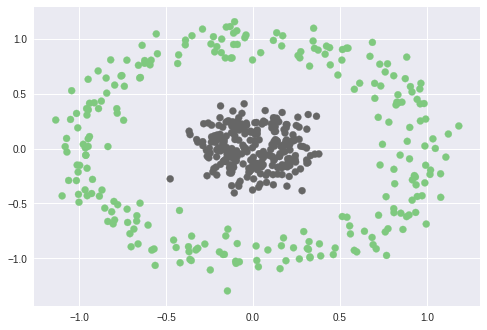

In [388]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [389]:
Y_oht = to_categorical(Y)

In [390]:
model = NeuralNetworkMock(input_size,hidden,output_size)

In [391]:
def train(X,Y_oht,epoch,model):
    
    training_loss = []
    for i in range(epoch):
        y_ = model.forward(X)
        l = loss(Y_oht,y_)
        training_loss.append(l)
        model.backward(X,Y_oht)
        
    return training_loss    

In [392]:
losses = train(X,Y_oht,1000,model)

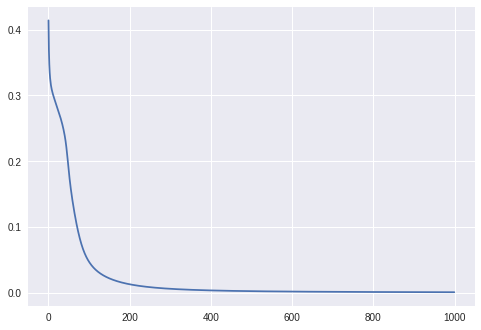

In [393]:
plt.plot(losses)
plt.show()

In [394]:
from visualize import plot_decision_boundary

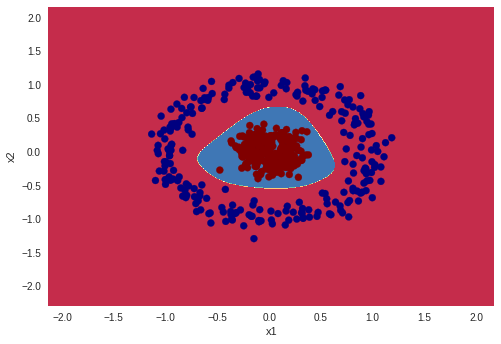

In [395]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [396]:
outputs = model.predict(X)

In [397]:
np.sum((outputs == Y))/X.shape[0]

1.0